In [4]:
import numpy as np

class LinearRegression:
    def __init__(self, lr = 0.025,num_iter = 1000,error = 0.0001):
        self.lr = lr
        self.num_iter = num_iter
        self.error = error
        self.weights = None
        self.bias = None
        self.loss = None





    def fit(self,X,y):
        num_samples, num_feats = X.shape
        # step 1: initialize the weights and bias
        self.weights = np.random.randn(num_feats)
        self.bias = np.random.randn()

        #step: 2-5
        for _ in range(self.num_iter):
            # step 2: predicted y 
            y_pred = self.predict(X)
            # step 3: calculate the loss
            self.loss = np.mean((y_pred - y)**2)
            # step 4: update the weights and bias
            dw = (1/num_samples) * np.dot(X.T,(y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db

            if self.loss < self.error:
                break
    
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred


In [6]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [20]:
X,y = datasets.make_regression(n_samples=1000,n_features=1,noise=20,random_state=4)

In [21]:
X.shape, y.shape

((1000, 1), (1000,))

In [23]:
# create a gif of the loss function with respect to the number of iterations
def plot_loss(loss):
    plt.plot(loss)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss function with respect to the number of iterations')
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)


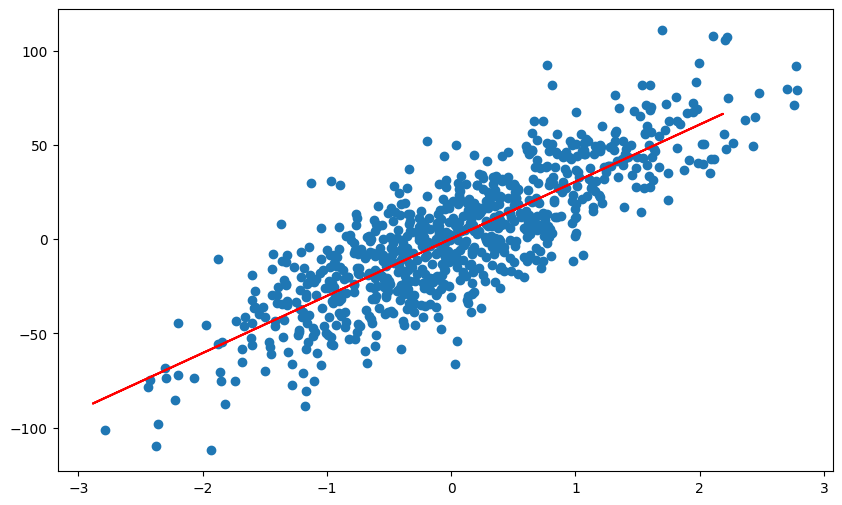

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.scatter(X_train,y_train)    
plt.plot(X_test,predictions,color='red')
plt.show()